In [51]:
# Import dependencies and setup

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [52]:
# Load and preview dataset

raw_df = pd.read_csv("../Resources/lithium_carbonate_price.csv", index_col='Year', parse_dates=True)
raw_df

,Average price of lithium carbonate
Year,
2010-01-01,5180
2011-01-01,5180
2012-01-01,6060
2013-01-01,6800
2014-01-01,6690
2015-01-01,6500
2016-01-01,8650
2017-01-01,15000
2018-01-01,17000


In [53]:
# Rename columns

lithium_df = data.rename(columns={'Average price of lithium carbonate':'Lithium_price'})
lithium_df

,Lithium_price
Year,
2010-01-01,5180
2011-01-01,5180
2012-01-01,6060
2013-01-01,6800
2014-01-01,6690
2015-01-01,6500
2016-01-01,8650
2017-01-01,15000
2018-01-01,17000


In [54]:
# Prepare for Prophet
# Reset index

df = lithium_df.reset_index()
df.head()

,Year,Lithium_price
0,2010-01-01,5180
1,2011-01-01,5180
2,2012-01-01,6060
3,2013-01-01,6800
4,2014-01-01,6690


In [55]:
# Rename 'Date' and 'USD/Barrel' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'Lithium_price':'y'})
df.head()

,ds,y
0,2010-01-01,5180
1,2011-01-01,5180
2,2012-01-01,6060
3,2013-01-01,6800
4,2014-01-01,6690


<AxesSubplot:xlabel='ds'>

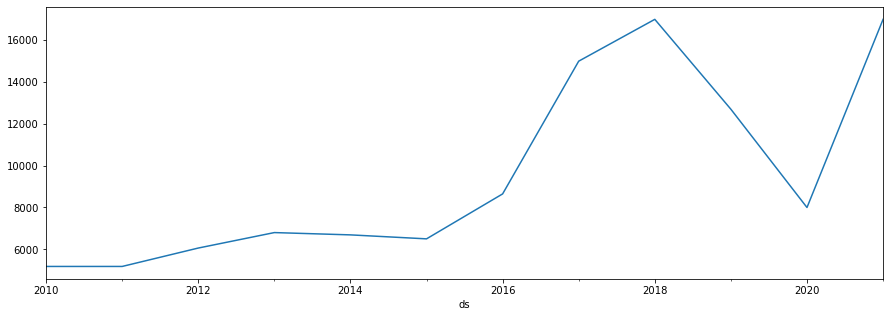

In [56]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [57]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

,ds,y
7,2017-01-01,9.615805
8,2018-01-01,9.740969
9,2019-01-01,9.449357
10,2020-01-01,8.987197
11,2021-01-01,9.740969


<AxesSubplot:xlabel='ds'>

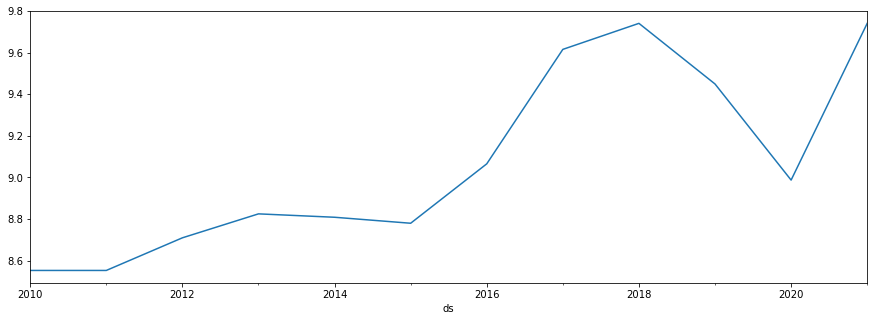

In [58]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [59]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [60]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=10, freq = 'y')
future.tail()

,ds
17,2026-12-31
18,2027-12-31
19,2028-12-31
20,2029-12-31
21,2030-12-31


In [61]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
17,2026-12-31,0.986841,6.845660,7.552179,0.650591,1.357110,6.195069,6.195069,6.195069,-56.239478,...,-0.345866,-0.345866,-0.345866,62.780413,62.780413,62.780413,0.0,0.0,0.0,7.181910
18,2027-12-31,1.064387,6.092253,7.012098,0.622530,1.542375,5.469723,5.469723,5.469723,-56.239478,...,0.120701,0.120701,0.120701,61.588501,61.588501,61.588501,0.0,0.0,0.0,6.534111
19,2028-12-31,1.142146,9.195809,10.324371,0.612062,1.740624,8.583747,8.583747,8.583747,-56.239478,...,0.305936,0.305936,0.305936,64.517290,64.517290,64.517290,0.0,0.0,0.0,9.725893
20,2029-12-31,1.219693,8.316987,9.679352,0.576164,1.938529,7.740823,7.740823,7.740823,-56.239478,...,0.222702,0.222702,0.222702,63.757599,63.757599,63.757599,0.0,0.0,0.0,8.960516
21,2030-12-31,1.297239,7.023887,8.622350,0.535259,2.133721,6.488629,6.488629,6.488629,-56.239478,...,-0.052306,-0.052306,-0.052306,62.780413,62.780413,62.780413,0.0,0.0,0.0,7.785868


In [62]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17,2026-12-31,7.181910,6.845660,7.552179
18,2027-12-31,6.534111,6.092253,7.012098
19,2028-12-31,9.725893,9.195809,10.324371
20,2029-12-31,8.960516,8.316987,9.679352
21,2030-12-31,7.785868,7.023887,8.622350


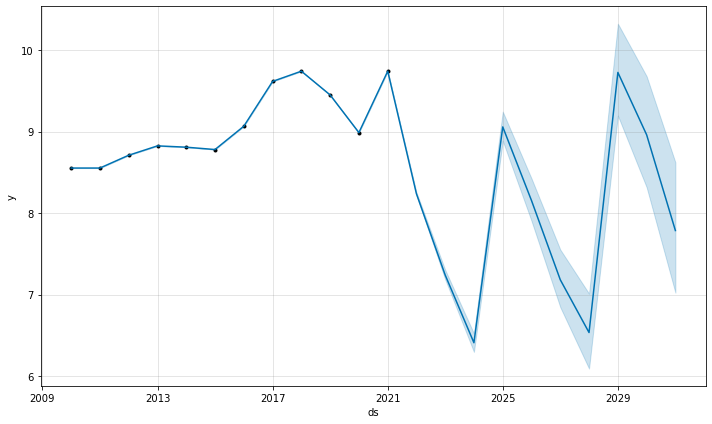

In [63]:
# Plot forecast

model.plot(forecast);

In [64]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [65]:
# Combine both dataframes

vis_df = lithium_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,Lithium_price,yhat,yhat_lower,yhat_upper
2010-01-01,5180.0,8.552560,8.552560,8.552560
2011-01-01,5180.0,8.552560,8.552560,8.552560
2012-01-01,6060.0,8.709465,8.709465,8.709465
2013-01-01,6800.0,8.824678,8.824678,8.824678
2014-01-01,6690.0,8.808369,8.808369,8.808369


In [66]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,Lithium_price,yhat,yhat_lower,yhat_upper,yhat_rescaled
2010-01-01,5180.0,8.552560,8.552560,8.552560,5180.0
2011-01-01,5180.0,8.552560,8.552560,8.552560,5180.0
2012-01-01,6060.0,8.709465,8.709465,8.709465,6060.0
2013-01-01,6800.0,8.824678,8.824678,8.824678,6800.0
2014-01-01,6690.0,8.808369,8.808369,8.808369,6690.0


<AxesSubplot:>

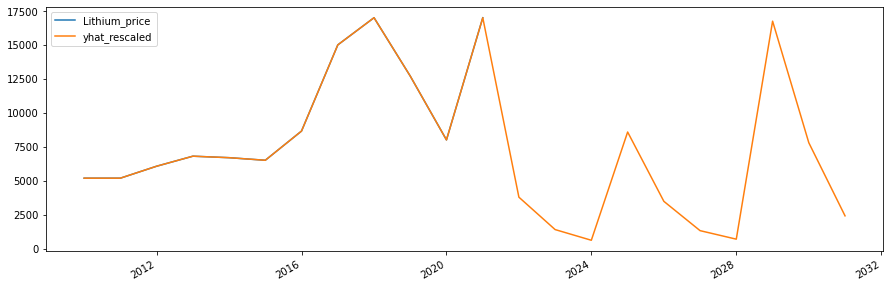

In [67]:
# Plot 'Lithium_price' and 'yhat_rescaled'

vis_df[['Lithium_price', 'yhat_rescaled']].plot()

In [68]:
# Ensure crude_oil and model data are connected

lithium_df.index = pd.to_datetime(lithium_df.index) #make sure our index as a datetime object
connect_date = lithium_df.index[-2] #select the 2nd to last date

In [69]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [70]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.521563,9.740969,9.740969,0.521563,0.521563,9.219406,9.219406,9.219406,-56.239478,-56.239478,...,0.120701,0.120701,0.120701,65.338183,65.338183,65.338183,0.0,0.0,0.0,9.740969
2021-12-31,0.598897,8.223545,8.256758,0.584724,0.617936,7.638821,7.638821,7.638821,-56.239478,-56.239478,...,0.120701,0.120701,0.120701,63.757599,63.757599,63.757599,0.0,0.0,0.0,8.237718
2022-12-31,0.676443,7.187930,7.303811,0.623961,0.739843,6.563969,6.563969,6.563969,-56.239478,-56.239478,...,0.023033,0.023033,0.023033,62.780413,62.780413,62.780413,0.0,0.0,0.0,7.240412
2023-12-31,0.753989,6.296924,6.522881,0.641966,0.867923,5.654958,5.654958,5.654958,-56.239478,-56.239478,...,0.305936,0.305936,0.305936,61.588501,61.588501,61.588501,0.0,0.0,0.0,6.408948
2024-12-31,0.831748,8.886248,9.244733,0.660743,1.019228,8.225505,8.225505,8.225505,-56.239478,-56.239478,...,-0.052306,-0.052306,-0.052306,64.517290,64.517290,64.517290,0.0,0.0,0.0,9.057253


In [71]:
# Create updated dataframe

vis_df = lithium_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [72]:
# Preview head

vis_df.head()

,Lithium_price,yhat,yhat_lower,yhat_upper,yhat_scaled
2010-01-01,5180.0,NaN,NaN,NaN,NaN
2011-01-01,5180.0,NaN,NaN,NaN,NaN
2012-01-01,6060.0,NaN,NaN,NaN,NaN
2013-01-01,6800.0,NaN,NaN,NaN,NaN
2014-01-01,6690.0,NaN,NaN,NaN,NaN


In [73]:
# Preview tail

vis_df.tail()

,Lithium_price,yhat,yhat_lower,yhat_upper,yhat_scaled
2026-12-31,NaN,7.181910,6.845660,7.552179,1315.418374
2027-12-31,NaN,6.534111,6.092253,7.012098,688.221460
2028-12-31,NaN,9.725893,9.195809,10.324371,16745.641018
2029-12-31,NaN,8.960516,8.316987,9.679352,7789.373383
2030-12-31,NaN,7.785868,7.023887,8.622350,2406.353510


In [75]:
# Save dataframe as .csv

csv = vis_df.to_csv('lithium_forecasted.csv', index=True)

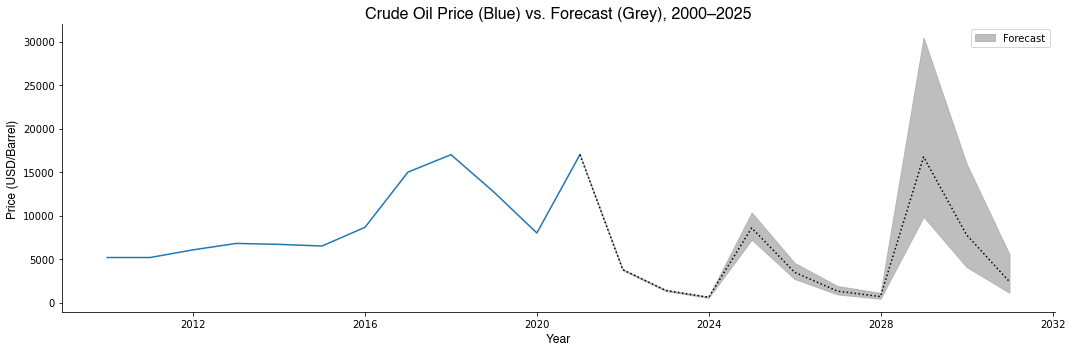

In [74]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.Lithium_price)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Crude Oil Price (Blue) vs. Forecast (Grey), 2000–2025', fontdict = font_1)
ax1.set_ylabel('Price (USD/Barrel)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/lithium_price_forecast.png", 
            transparent=False, dpi=300)
plt.show()

In [76]:
# Save model
import json
from prophet.serialize import model_to_json, model_from_json

# Save
with open('./lithium_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)